# Kaggle 프로젝트

## **" 심장마비 분석 데이터를 활용한 심장마비 예측 모델 "**

> ### [2조]
> *   컴퓨터메카트로닉스공학부 2018101450 안서현
> *   컴퓨터메카트로닉스공학부 2019101412 이예찬
> *   IT융합공학부 2020101466 한재하
> *   인공지능융합학부 2021100893 심선우
> *   인공지능융합학부 2021100914 임수정
> *   인공지능융합학부 2021100944 한규영







---


데이터 셋 출처



[Heart Attack Analysis & Prediction Dataset]

→ https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep', font_scale=2.5)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 데이터 불러오기
filename = './heart.csv'
data = pd.read_csv(filename)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# 데이터셋 구조 확인 
print("The shape of the dataset is : ", data.shape)

The shape of the dataset is :  (303, 14)


각 변수를 확인해 보자.


> - Age : 환자 나이
> - Sex : 환자 성별
> - cp : 가슴 통증 타입
>  - Value 0: 전형적 가슴 통증(typical angina)
>  - Value 1: 비전형적 가슴 통증(atypical angina)
>  - Value 2: 비심인성 가슴 통증(non-anginal pain)
>  - Value 3: 무증상(asymptomatic)
> - trtbps : 안정시 혈압 (in mm Hg)
> - chol : 혈청 콜레스테롤
> - fbs : 공복 혈당(fasting blood sugar > 120 mg/dl)
>  - Value 0 : False
>  - Value 1 : True
> - rest_ecg : 안정시 심전도
>  - Value 0 : 정상
>  - Value 1 : ST-T 이상(T wave inversions and/or ST elevation or depression of > 0.05 mV)
>  - Value 2 : 좌심실이상
> - thalach : 최대 심장박동 수
> - exang: 운동 유도 협심증
>  - Value 0 : No
>  - Value 1 : Yes
> - oldpeak : previous peak
> - slp : ST 세그먼트 기울기
> - caa: 주요 혈관 수(0-3)
> - thall : thallium stress test result (0-3)
> 
> 
> - output
>  - Value 0 : less chance of heart attack 
>  - Value 1: more chance of heart attack

In [4]:
# 유실 데이터 확인
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
# 변수 별 데이터 갯수 확인 
data.count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

### EDA
- 데이터 사이의 관계를 알아보고자 EDA 진행


---
활용한 기존 코드 출처

[Heart Attack - EDA + Prediction (90% accuracy)]

→ https://www.kaggle.com/code/namanmanchanda/heart-attack-eda-prediction-90-accuracy/notebook

In [6]:
# 현재 데이터가 연속형과 범주형으로 분리되어 있기 때문에 각 항목별로 분류해준다.
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


#### 변수별 갯수 확인

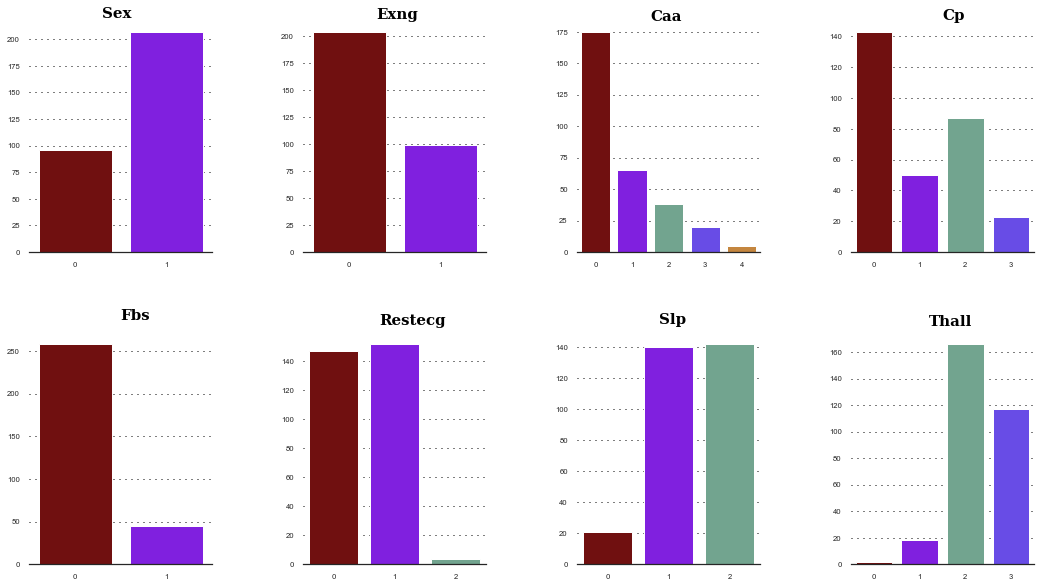

In [7]:
# 범주형 변수 각각의 갯수 확인 
fig = plt.figure(figsize=(18,10))
sns.set(font_scale=0.7) 
sns.set_style("white")
gs = fig.add_gridspec(2,4)
gs.update(wspace=0.5, hspace=0.35)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[0,3])
ax5 = fig.add_subplot(gs[1,0])
ax6 = fig.add_subplot(gs[1,1])
ax7 = fig.add_subplot(gs[1,2])
ax8 = fig.add_subplot(gs[1,3])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Sex
ax1.text(0.3, 220, 'Sex', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=data,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng
ax2.text(0.3, 216, 'Exng', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=data,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa
ax3.text(1.5, 184, 'Caa', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=data,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp
ax4.text(1.5, 151, 'Cp', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=data,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs
ax5.text(0.5, 286, 'Fbs', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=data,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg
ax6.text(0.75, 165, 'Restecg', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=data,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp
ax7.text(0.85, 155, 'Slp', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=data,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall
ax8.text(1.2, 180, 'Thall', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=data,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

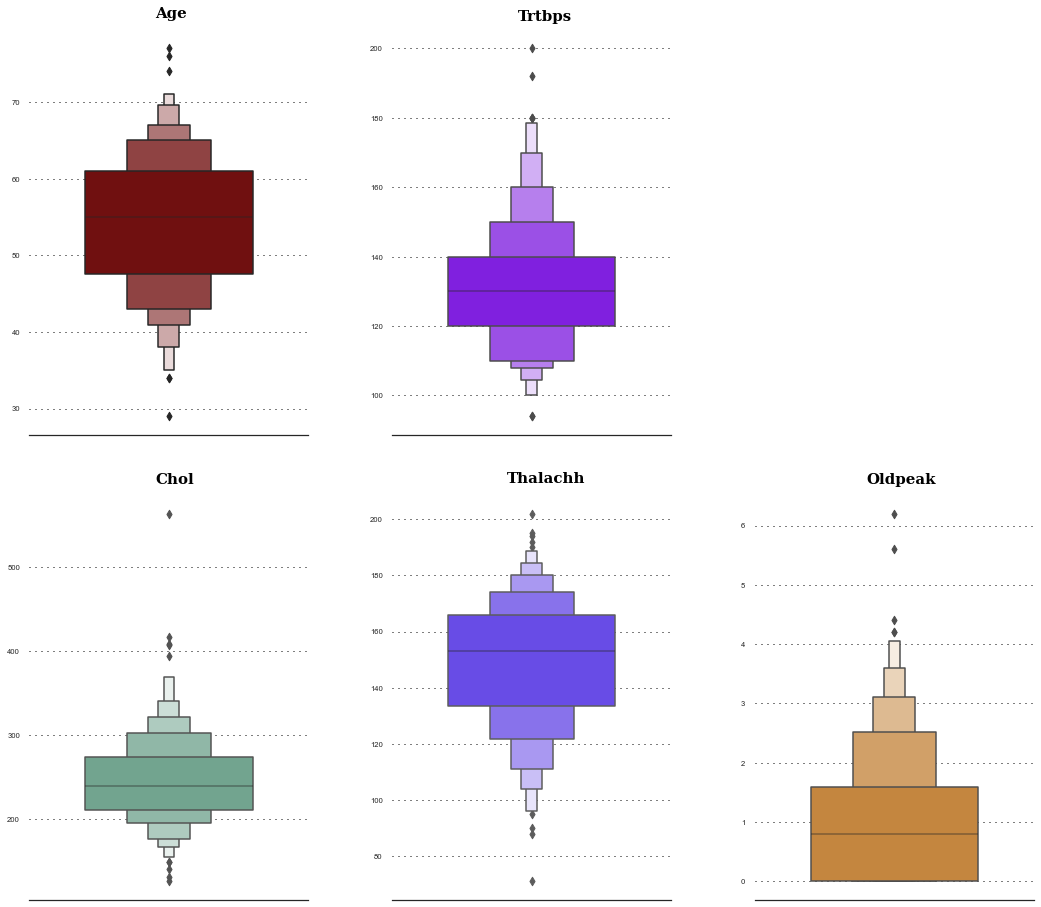

In [8]:
# 연속형 변수 각각의 분포 확인
fig = plt.figure(figsize=(18,16))
sns.set(font_scale=0.7) 
sns.set_style("white")
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


# Age 
ax0.text(-0.05, 81, 'Age', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax0,y=data['age'],palette=["#800000"],width=0.6)
ax0.set_xlabel("")
ax0.set_ylabel("")

# Trtbps 
ax1.text(-0.05, 208, 'Trtbps', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=data['trtbps'],palette=["#8000ff"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=data['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 213, 'Thalachh', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=data['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.7, 'Oldpeak', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=data['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

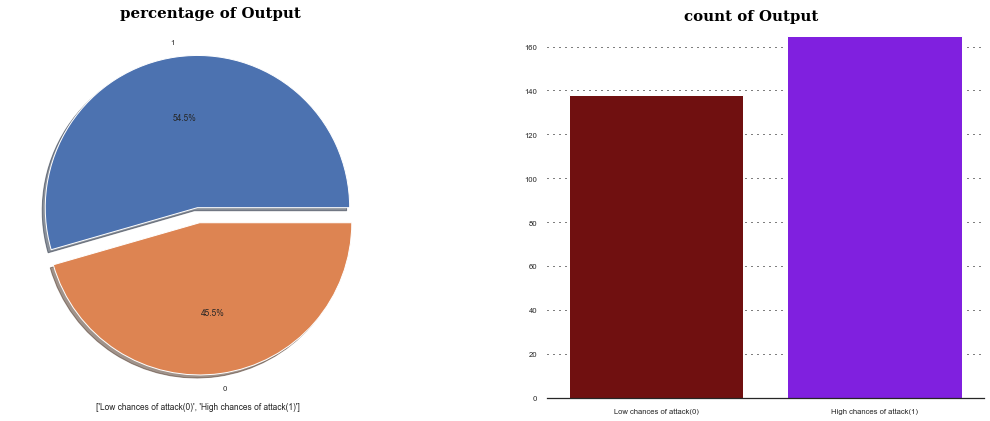

In [9]:
# 심장마비 target 갯수 확인
fig = plt.figure(figsize=(18,7))
sns.set(font_scale=0.7) 
sns.set_style("white")
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

data["output"].value_counts().plot.pie(ax=ax0, shadow=True, explode=[0, 0.1], autopct='%1.1f%%')
ax0.text(-0.51, 1.25, 'percentage of Output',fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax0.set_xlabel(["Low chances of attack(0)","High chances of attack(1)"])
ax0.set_ylabel('')

ax1.text(0.13, 172,"count of Output",fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=data, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

plt.show()

#### 변수들간 상관관계 확인 

In [10]:
# 다변량분석을 통한 연속형 변수들간의 상관관계 확인
data_corr = data[con_cols].corr(method = 'pearson')
data_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


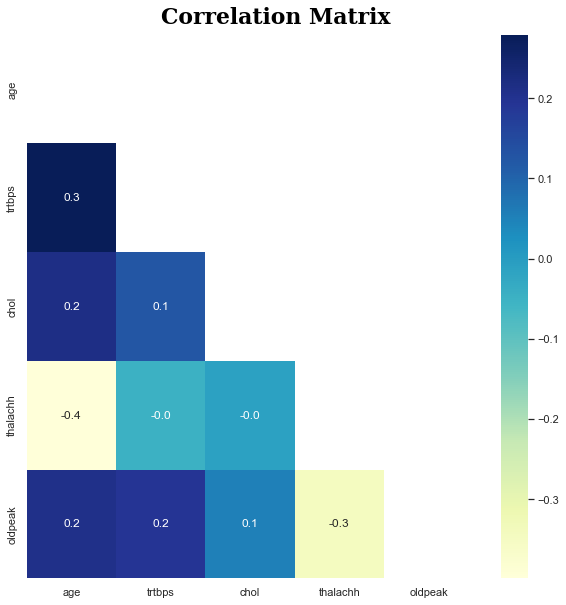

In [11]:
# heapmap으로 다변량분석 확인 
fig = plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.set_style("white")
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(data_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = data[con_cols].corr().transpose()
sns.heatmap(data_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

<Figure size 864x864 with 0 Axes>

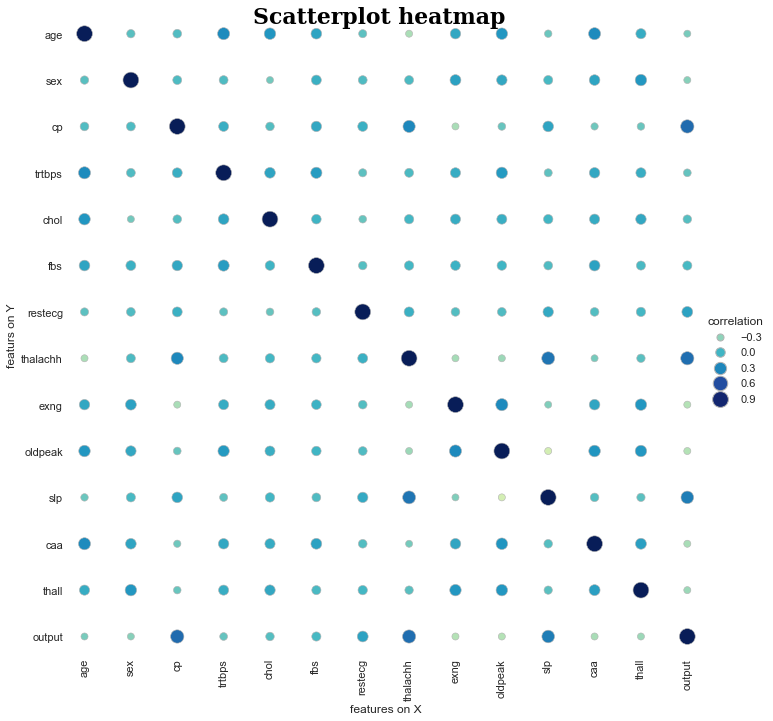

In [12]:
# scatterplot heatmap을 이용하여 변수들간의 상관관계 확인
fig = plt.figure(figsize=(12,12))
corr_mat = data.corr().stack().reset_index(name="correlation")
sns.set(font_scale=1)
sns.set_style("white")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

#### 타킷 데이터와 변수들간 분포도 확인 

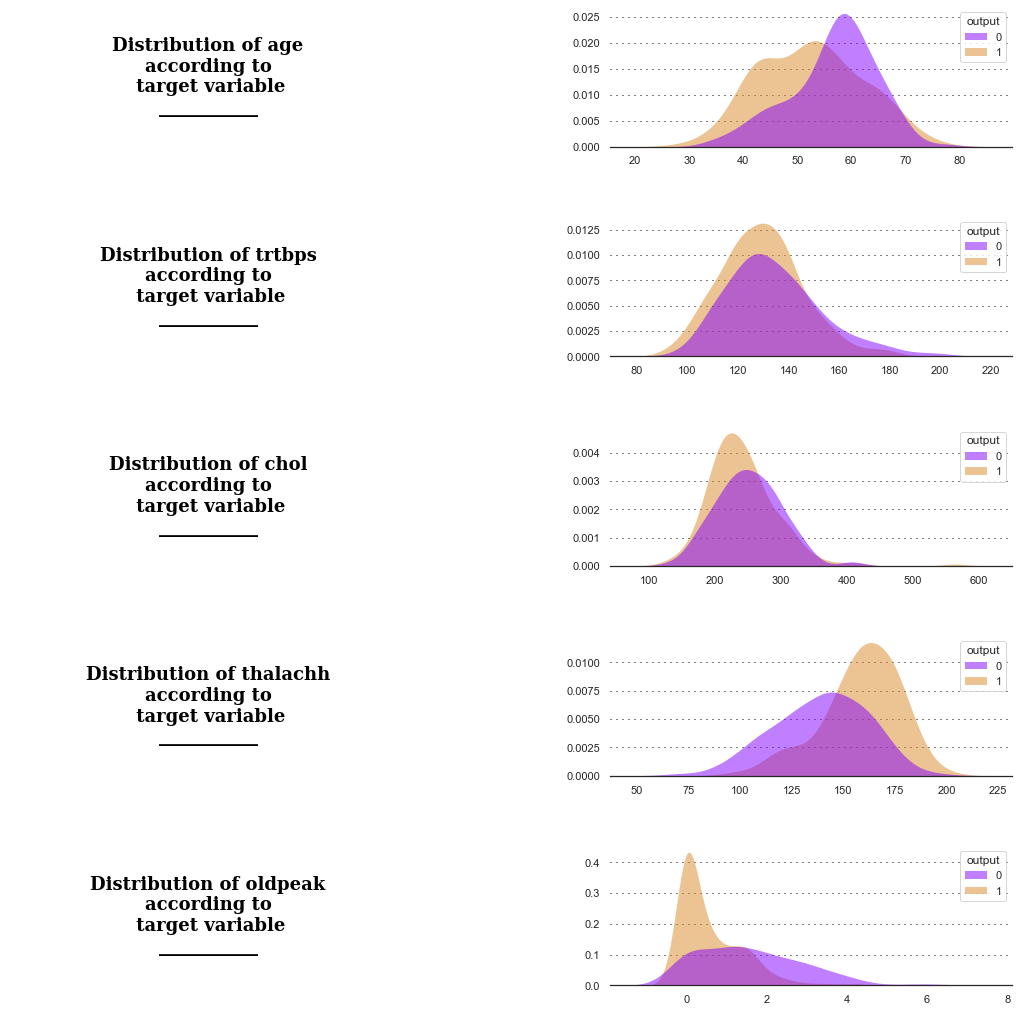

In [13]:
# 심장마비 output 데이터와 연속형 변수들간의 분포도 확인
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=data, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=data, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=data, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=data, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=data, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

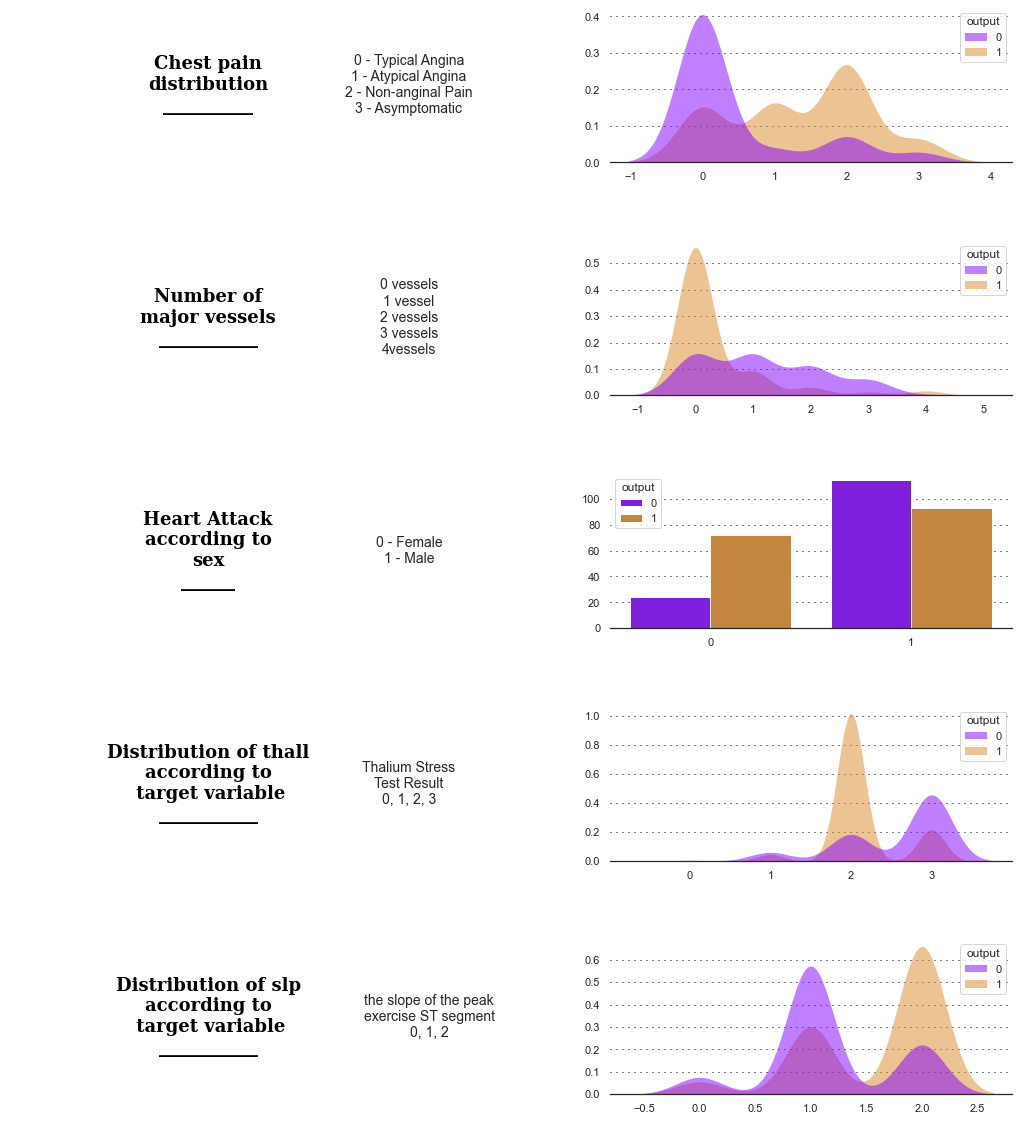

In [14]:
# 심장마비 output 데이터와 범주형 변수들간의 분포도 확인
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=data, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=data, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=data,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=data, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")


# Slp title
ax8.text(0.5,0.5,"Distribution of slp\naccording to\n target variable\n___________", 
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1.05,.5,"the slope of the peak\nexercise ST segment\n0, 1, 2",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)


# Slp
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=data, x='slp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

### MODELING
- 다양한 모델을 통한 예측 정확도 확인



---
[사용 MODEL]


*   선형 분류(Linear Classifiers)
>  1.   SVM(Support Vector Machines)
>  2.   SVC
>  3.   Logistic Regression
>  4.   ROC Curve

*   K-NN Algorithm(K-Nearest Neighbor)

*   Naive Bayes Algorithm

*   트리 모델
>  1.   Decision Tree
>  2.   Random Forest
>  3.   Gradient Boosting Classifier


In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() #표준화로 scaling

In [16]:
# 데이터 복제
df = data

# One-Hot Encoding을 위한 범주형 변수들의 dummy 생성
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

# 심장마비 output데이터를 target 데이터로 정의
X = df.drop(['output'],axis=1)
y = df[['output']]

# 연속형 변수들 스케일링
X[con_cols] = ss.fit_transform(X[con_cols])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [17]:
# train, test data 분리 후 각각의 형태 확인 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [18]:
# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### SVM(Support Vector Machines)

In [19]:
# 모델에 train data 훈련
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# test data에 대한 예측값
y_pred = clf.predict(X_test)

# test data에 대한 예측 정확도 출력  
# same as : print("SVM Score: {:.2f}%".format(clf.score(X_test, y_test)*100))
print("SVM Score: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

SVM Score: 86.89%


In [20]:
# SVM 모델에 가장 주요하게 관여하는 변수 확인 
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf.coef_[0]
})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
13,cp_3,1.213934
10,caa_4,1.000000
12,cp_2,0.992862
20,thall_2,0.609475
18,slp_2,0.432019
14,fbs_1,0.325725
11,cp_1,0.314756
3,thalachh,0.208382
0,age,0.132945
15,restecg_1,0.026588


#### SVC

In [21]:
svm = SVC()

# 넓지 않게 그리드 값 설정 
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

searcher = GridSearchCV(svm, parameters)

# 모델에 train data 훈련
searcher.fit(X_train, y_train)

# 결과 출력 
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# 모델을 통한 test data 예측 
y_pred = searcher.predict(X_test)

# test data에 대한 예측 정확도 출력 
print("SVC(SVM after hyper-parameter tuning) Score: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

The best params are : {'C': 4, 'gamma': 0.05}
The best score is   : 0.8304421768707483
SVC(SVM after hyper-parameter tuning) Score: 88.52%


#### Logistic Regression

In [22]:
logreg = LogisticRegression()

# 모델에 train data 훈련
logreg.fit(X_train, y_train)

# 모델을 통한 test data 예측 
y_pred_proba = logreg.predict_proba(X_test)

# 예측값 찾기 
y_pred = np.argmax(y_pred_proba,axis=1)

# test data에 대한 예측 정확도 출력 
print("Logistric Regression Score: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Logistric Regression Score: 90.16%


In [23]:
# Logistic Regression 모델에 가장 주요하게 관여하는 변수 확인 
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': logreg.coef_[0]
})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
13,cp_3,1.342057
12,cp_2,1.314440
18,slp_2,0.592695
20,thall_2,0.523931
10,caa_4,0.471555
11,cp_1,0.464910
15,restecg_1,0.344190
3,thalachh,0.327030
14,fbs_1,0.324056
19,thall_1,0.207327


#### ROC Curve

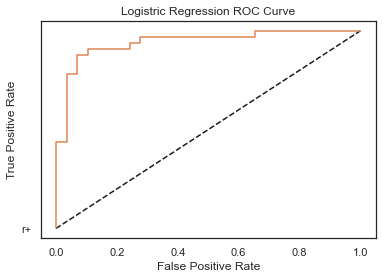

In [24]:
# 모델을 통한 test data 예측 
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# ROC Curve 인스턴스 설정 
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plot으로 ROC Curve 확인 
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

#### K-NN Algorithm

In [25]:
# k값 2로 KNN Model 설정
knn = KNeighborsClassifier(n_neighbors = 2)

# 모델에 train data 훈련
knn.fit(X_train, y_train)

# 모델을 통한 test data 예측 
prediction = knn.predict(X_test)

# test data에 대한 예측 정확도 출력
print("{}-NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2-NN Score: 85.25%


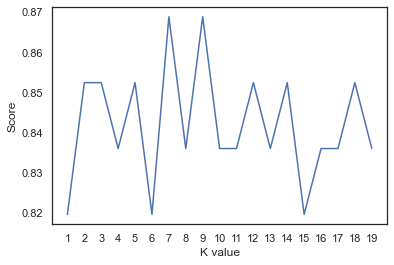

Maximum KNN Score is 86.89%


In [26]:
# 최적의 k값 찾아 예측 정확도 출력 
scoreList = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors = i) # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

plt.plot(range(1, 20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

#### Naive Bayes Algorithm

In [27]:
nb = GaussianNB()

# 모델에 train data 훈련
nb.fit(X_train, y_train)

# 모델을 통한 test data 예측 
prediction = nb.predict(X_test)

# test data에 대한 예측 정확도 출력
print("Naive Bayes Score: {:.2f}%".format(nb.score(X_test, y_test)*100))

Naive Bayes Score: 65.57%


#### Decision Tree

In [28]:
dt = DecisionTreeClassifier(random_state = 42)

# 모델에 train data 훈련
dt.fit(X_train, y_train)

# 모델을 통한 test data 예측 
y_pred = dt.predict(X_test)

# test data에 대한 예측 정확도 출력
print("Decision Tree Score: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Decision Tree Score: 78.69%


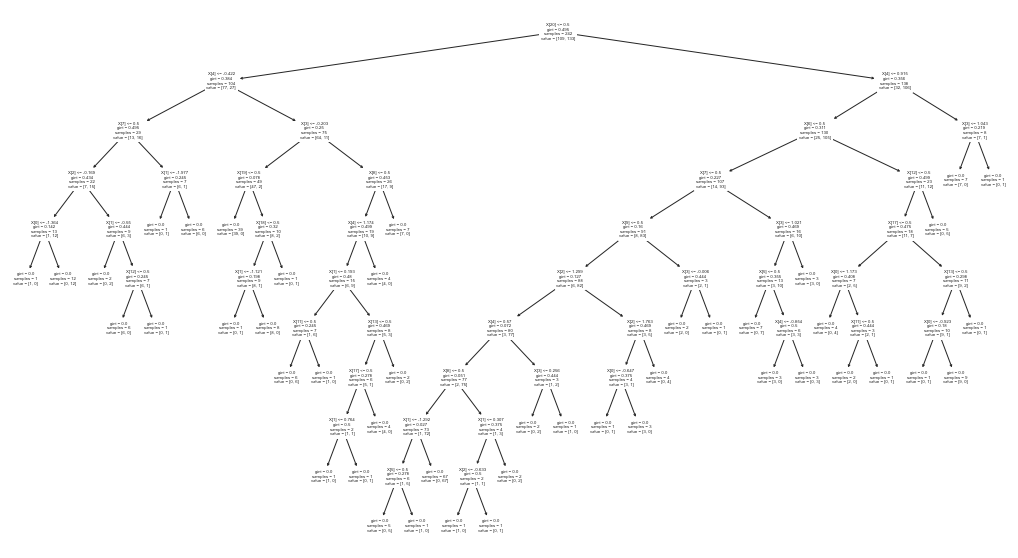

In [29]:
plt.figure(figsize=(18,10))
plot_tree(dt)
plt.show()

#### Random Forest

In [30]:
rf = RandomForestClassifier()

# 모델에 train data 훈련
rf.fit(X_train, y_train)

# 모델을 통한 test data 예측 
y_pred = dt.predict(X_test)

# test data에 대한 예측 정확도 출력
print("Random Forest Score: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Random Forest Score: 78.69%


In [31]:
# Random Forest 모델에 가장 주요하게 관여하는 변수 확인 
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
4,oldpeak,0.134294
3,thalachh,0.105965
0,age,0.091475
2,chol,0.082009
6,exng_1,0.079792
20,thall_2,0.074177
1,trtbps,0.073298
21,thall_3,0.065719
7,caa_1,0.045672
18,slp_2,0.043499


#### Gradient Boosting Classifier

In [32]:
# 모델 설정 
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# 모델에 train data 훈련
gbt.fit(X_train,y_train)

# 모델을 통한 test data 예측 
y_pred = gbt.predict(X_test)

# test data에 대한 예측 정확도 출력
print("Gradient Boosting Classifier Score: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Gradient Boosting Classifier Score: 86.89%


### 각 모델 별 예측 정확도 결과 

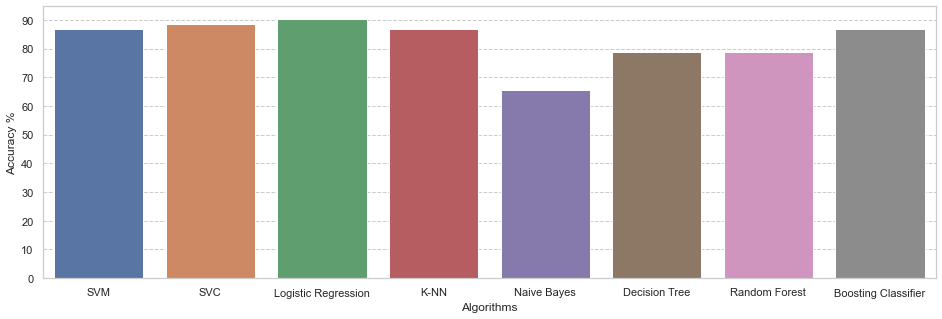

In [33]:
methods = ["SVM", "SVC", "Logistic Regression", "K-NN", "Naive Bayes", "Decision Tree", "Random Forest", "Boosting Classifier"]
accuracy = [86.89, 88.52, 90.16, 86.89, 65.57, 78.69, 78.69, 86.89]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.grid(visible=True, linestyle='--', axis='y')
sns.barplot(x=methods, y=accuracy)

plt.show()